In [34]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instalar o pacote devtools, se ainda não estiver instalado
robjects.r('install.packages("devtools")')

# Carregar o pacote devtools
robjects.r('library(devtools)')

# Instalar o pacote mananciais
robjects.r('devtools::install_github("beatrizmilz/mananciais")')

# Carregar o pacote mananciais
robjects.r('library(mananciais)')

# Chamar a função dados_mananciais
robjects.r('mananciais <- mananciais::dados_mananciais()')

# Obter o dataframe em Python
mananciais_py = robjects.r('mananciais')

# Converter o dataframe R para um dataframe Pandas
mananciais_df = pandas2ri.rpy2py(mananciais_py) 

# Converter a coluna "Data" para datetime
mananciais_df['data'] = pd.to_datetime(mananciais_df['data'], unit='D', origin='1970-01-01')

# Filtrar para manter apenas dados de 01/01/2013 em diante.
filtro = mananciais_df['data'] > '2012-12-31'
dados_apos_2013 = mananciais_df[filtro]

# Salvar arquivo baixado e modificado em um csv.
dados_apos_2013.to_csv('mananciaisfiltrado.csv', index=False)

R[write to console]: Warning:
R[write to console]:  package 'devtools' is in use and will not be installed

R[write to console]: Skipping install of 'mananciais' from a github remote, the SHA1 (c3e42a56) has not changed since last install.
  Use `force = TRUE` to force installation



c:\Users\gabri\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gabri\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gabri\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gabri\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

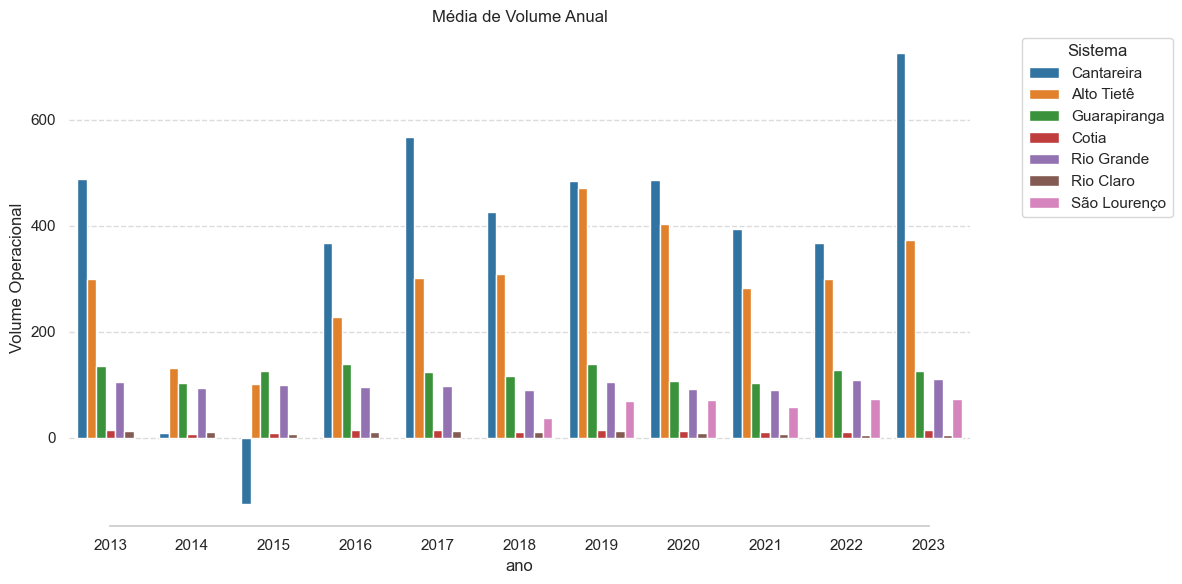

In [40]:
#Gerar Barras

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Converter a coluna 'data' para datetime
dados_apos_2013['data'] = pd.to_datetime(dados_apos_2013['data'])

# Extrair o ano da coluna 'data'
dados_apos_2013['ano'] = dados_apos_2013['data'].dt.year

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Criar gráfico de barras empilhadas verticalmente
plt.figure(figsize=(12, 6))
sns.barplot(x='ano', y='volume_operacional', hue='sistema', data=dados_apos_2013, palette='tab10', ci=None)
plt.ylabel('Volume Operacional')
plt.title('Média de Volume Anual')
plt.legend(title='Sistema', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remover bordas desnecessárias
sns.despine(trim=True, left=True)

# Ajustar layout para evitar cortar o título
plt.tight_layout()

plt.show()

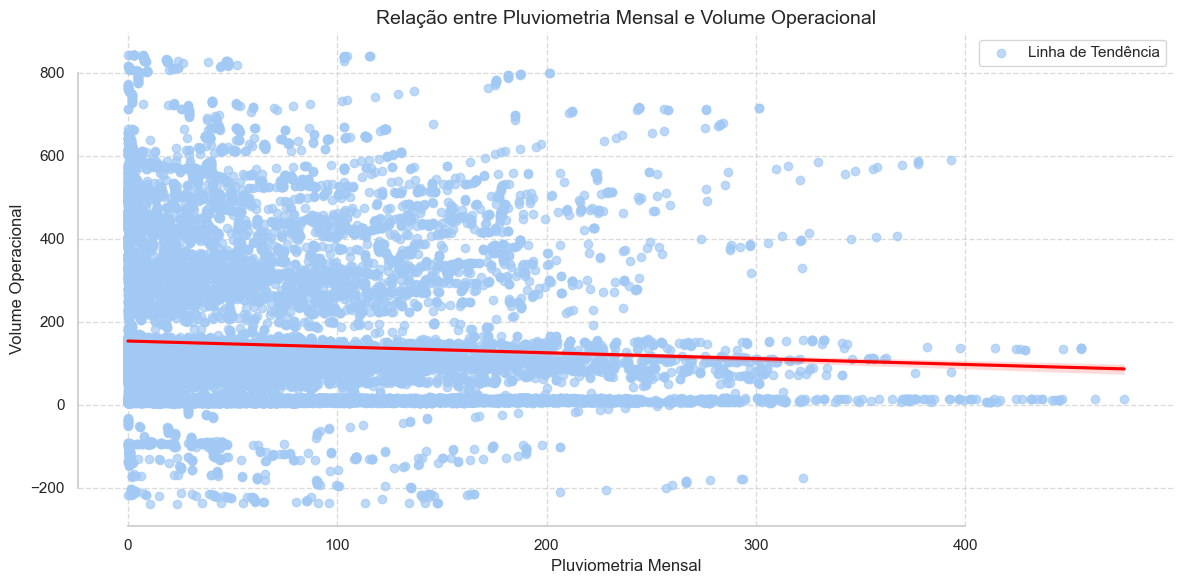

In [47]:
#Gerar Dispersão

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Criar gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 6))
scatter_plot = sns.regplot(x='pluviometria_mensal', y='volume_operacional', data=dados_apos_2013, scatter_kws={'alpha':0.7}, line_kws={'color': 'red'})
plt.xlabel('Pluviometria Mensal', fontsize=12)
plt.ylabel('Volume Operacional', fontsize=12)
plt.title('Relação entre Pluviometria Mensal e Volume Operacional', fontsize=14)

# Adicionar grade para facilitar a leitura
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Adicionar legenda para a linha de tendência
scatter_plot.legend(['Linha de Tendência'], loc='upper right')

# Ajustar layout para evitar cortar o título
plt.tight_layout()

# Remover bordas desnecessárias
sns.despine(trim=True)

plt.show()


c:\Users\gabri\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

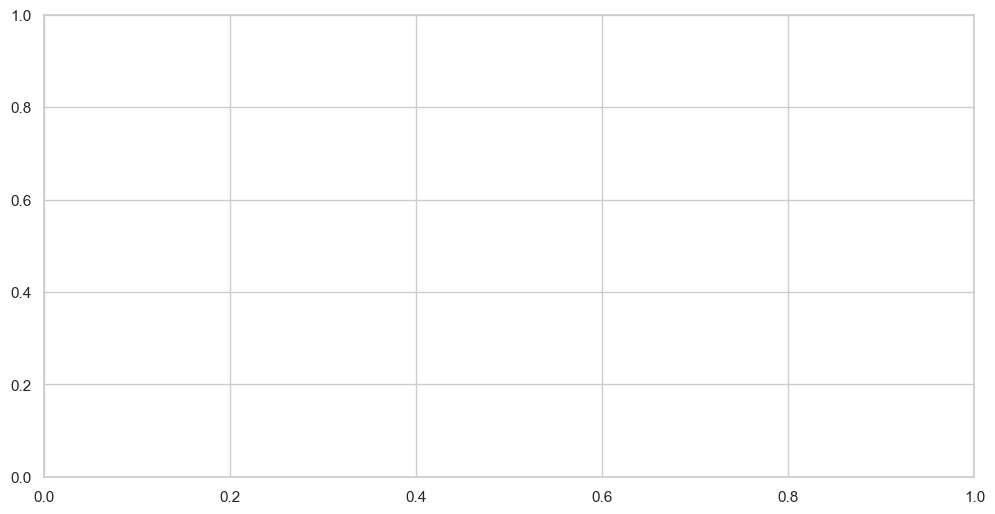

In [41]:
#Gerar Histograma

In [ ]:
#Gerar Boxspot